### Generate map

In [22]:
# load modules
import pandas as pd
import matplotlib.pyplot as plt
import geopandas as gpd

In [52]:
# world map
world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))

# world cities
world_cities = gpd.read_file(gpd.datasets.get_path('naturalearth_cities'))


In [53]:
world_cities.head()

,name,geometry
0,Vatican City,POINT (12.45339 41.90328)
1,San Marino,POINT (12.44177 43.93610)
2,Vaduz,POINT (9.51667 47.13372)
3,Luxembourg,POINT (6.13000 49.61166)
4,Palikir,POINT (158.14997 6.91664)


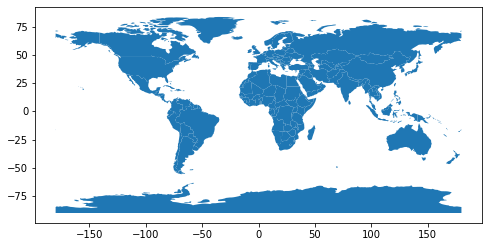

In [54]:
# plot world map
fig,ax = plt.subplots(figsize=(8,6))
world.plot(ax=ax)
plt.show()

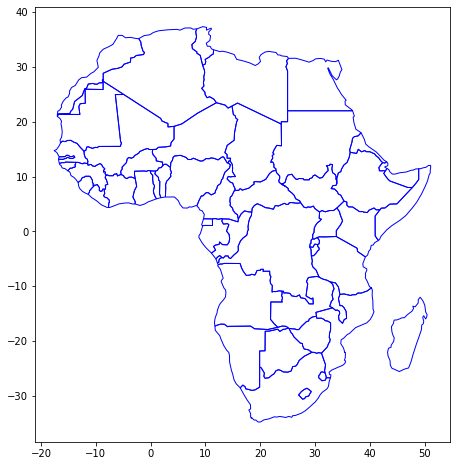

In [80]:
# Africa map
africa = world[world['continent']=='Africa']
fig,ax = plt.subplots(figsize=(8,8))
africa.plot(facecolor='none',edgecolor='blue',ax=ax)
plt.show()

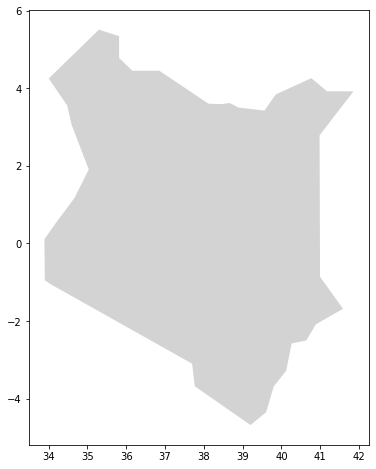

In [77]:
# show the location of cities
kenya = world[world['name']=='Kenya']
fig,ax = plt.subplots(figsize=(10,8))
kenya.plot(color='lightgrey',ax=ax)
# filtered_df.plot(ax=ax)
plt.show()

In [81]:
# plot Kenyan cities
name = ['Nairobi','Mombasa','Malindi','Eldoret','Kisumu']
latitude = [-1.28140,-4.035278,-3.221153,0.525832,-0.096259]
longitude = [36.81471,39.664525,40.112454,35.262686,34.800641]

cities_df = pd.DataFrame(list(zip(name,latitude,longitude)),
                         columns=['name','latitude','longitude'])
cities_df

,name,latitude,longitude
0,Nairobi,-1.281400,36.814710
1,Mombasa,-4.035278,39.664525
2,Malindi,-3.221153,40.112454
3,Eldoret,0.525832,35.262686
4,Kisumu,-0.096259,34.800641


In [83]:
cities_gdf = gpd.GeoDataFrame(cities_df,
                              geometry=gpd.points_from_xy(cities_df.longitude,cities_df.latitude))
cities_gdf

,name,latitude,longitude,geometry
0,Nairobi,-1.281400,36.814710,POINT (36.81471 -1.28140)
1,Mombasa,-4.035278,39.664525,POINT (39.66452 -4.03528)
2,Malindi,-3.221153,40.112454,POINT (40.11245 -3.22115)
3,Eldoret,0.525832,35.262686,POINT (35.26269 0.52583)
4,Kisumu,-0.096259,34.800641,POINT (34.80064 -0.09626)


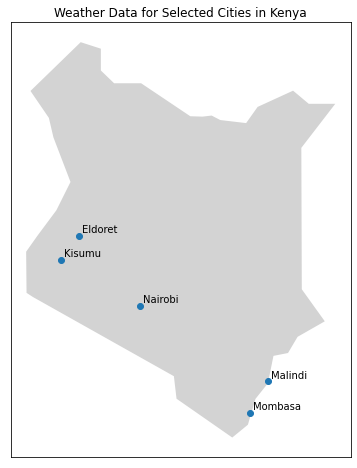

In [107]:
# plot the cities on the map
fig,ax = plt.subplots(figsize=(10,8))
kenya.plot(color='lightgrey',ax=ax)
cities_gdf.plot(ax=ax)
for x, y, label in zip(cities_gdf.geometry.x, cities_gdf.geometry.y, cities_gdf.name):
    ax.annotate(label, xy=(x, y), xytext=(3, 3), textcoords="offset points")

plt.title('Weather Data for Selected Cities in Kenya')
# ax.set_yticklabels([])
# ax.set_xticklabels([])
plt.gca().axes.get_yaxis().set_visible(False)
plt.gca().axes.get_xaxis().set_visible(False)

# save file
plt.savefig('img/selected_cities.png')
plt.show()
